In [91]:
import numpy as np

# Generate data according to poisson process

def dgp_poisson(N):
    r = np.random.poisson(10, N)
    return r

In [95]:
# Mechanism 1

def clamp(x, bounds):
    """Replace any x_i less than lower with lower, 
           and any x_i greater than upper with upper."""
    return np.clip(x, *bounds)

def dp_function(x, epsilon, upper):
    n = len(x)
    x = clamp(x, (0, upper))
    x_bar = np.mean(x)
    laplace = np.random.laplace(loc=0, scale=upper/(n*epsilon), size=1)
    return clamp(x_bar + laplace, (0, upper))

In [96]:
import math
def RMSE(answers, exact_vals):
    diff = exact_vals - answers
    total = sum(diff**2)
    return math.sqrt(total/len(answers))

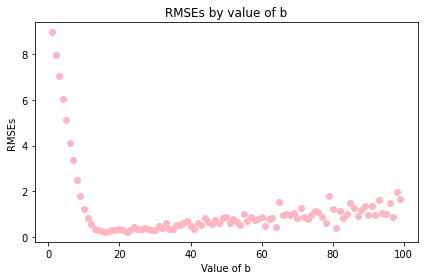

(array([16]),)


In [107]:
# Plotting
num_trials = 20

def run_trial(x, epsilon, b):
    answers = np.zeros(num_trials)
    exacts = np.zeros(num_trials)
    for i in range(num_trials):
        x = dgp_poisson(N)
        answers[i] = dp_function(x, epsilon, b)
        exacts[i] = np.mean(x)
    return RMSE(answers, exacts)

import matplotlib.pyplot as plt

N=200
epsilon=0.5
max_b = 100
y_vals = np.zeros(max_b)

for b in range(max_b):
    y_vals[b] = run_trial(x, epsilon, b)

plt.scatter(range(1, max_b), y_vals[1:], color='lightpink', label="RMSEs")
plt.title("RMSEs by value of b")
plt.xlabel("Value of b")
plt.ylabel('RMSEs')

plt.tight_layout()
plt.savefig('hw3_plot.png')
plt.show()

print(np.where(y_vals == np.amin(y_vals)))